<a href="https://colab.research.google.com/github/ish7161/Ishika_INBT03235_August2023/blob/main/main_project/IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Preparation

In [1]:
import pandas as pd

loading the dataset

In [2]:
dataset = pd.read_csv('/content/IMDB Dataset.csv')

In [3]:
print(dataset.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
print(dataset.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


Checking the null values

In [6]:
print(dataset.isnull().sum())

review       0
sentiment    0
dtype: int64


Filling the null values

In [7]:
dataset.fillna(0, inplace=True)

In [8]:
dataset.drop_duplicates(inplace=True)

## Tokenization

In [9]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

dataset['review'] = dataset['review'].apply(lambda x: x.lower())
dataset['review'] = dataset['review'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
display(dataset)

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, ., <, br, /...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, 's, a, family, where, a, li...",negative
4,"[petter, mattei, 's, ``, love, in, the, time, ...",positive
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",positive
49996,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...",negative
49997,"[i, am, a, catholic, taught, in, parochial, el...",negative
49998,"[i, 'm, going, to, have, to, disagree, with, t...",negative


In [11]:
import os
os.environ["NLTK_DATA"] = "https://nltk.org/nltk_data/"

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
dataset['review'] = dataset['review'].apply(lambda x: [re.sub(r'[^a-zA-Z]', '', word) for word in x])

In [14]:
stop_words = set(stopwords.words('english'))
dataset['review'] = dataset['review'].apply(lambda x: [word for word in x if word not in stop_words])

In [15]:
stemmer = PorterStemmer()
dataset['review'] = dataset['review'].apply(lambda x: [stemmer.stem(word) for word in x])

In [16]:
dataset['review'] = dataset['review'].apply(lambda x: ' '.join(x))

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.2, random_state=42)

In [19]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Naive Bayes Classifier

In [20]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [21]:
y_pred = naive_bayes_classifier.predict(X_test_vectorized)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8542906120802662


In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4939
    positive       0.87      0.84      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [24]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4293  646]
 [ 799 4179]]


In [25]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [26]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
naive_bayes_classifier_bow = MultinomialNB()
naive_bayes_classifier_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [28]:
y_pred_bow = naive_bayes_classifier_bow.predict(X_test_bow)

In [29]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Accuracy using BoW:", accuracy_bow)

Accuracy using BoW: 0.8542906120802662


In [30]:
naive_bayes_classifier_tfidf = MultinomialNB()
naive_bayes_classifier_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [31]:
y_pred_tfidf = naive_bayes_classifier_tfidf.predict(X_test_tfidf)

In [32]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy using TF-IDF:", accuracy_tfidf)

Accuracy using TF-IDF: 0.8630634264394474


In [33]:
print("Classification Report using BoW:")
print(classification_report(y_test, y_pred_bow))

Classification Report using BoW:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4939
    positive       0.87      0.84      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [34]:
print("Classification Report using TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

Classification Report using TF-IDF:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4939
    positive       0.87      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [35]:
print("Confusion Matrix using BoW:")
print(confusion_matrix(y_test, y_pred_bow))

Confusion Matrix using BoW:
[[4293  646]
 [ 799 4179]]


In [36]:
print("Confusion Matrix using TF-IDF:")
print(confusion_matrix(y_test, y_pred_tfidf))

Confusion Matrix using TF-IDF:
[[4297  642]
 [ 716 4262]]


In [37]:
X = dataset['review']
y = dataset['sentiment']

In [38]:
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_bow=count_vectorizer.transform(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

## Model Evaluation

Evaluation metrics

In [41]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8542906120802662
Precision: 0.8546458706753619
Recall: 0.8542906120802662
F1 Score: 0.8542647668394588


Cross Validation

In [42]:
cv_scores = cross_val_score(naive_bayes_classifier, X_train_bow, y_train, cv=3)


In [43]:
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.84972016 0.85335048 0.84494365]
Mean Cross-Validation Score: 0.8493380966986904


In [44]:
new_reviews = [
    "This is a great movie! I loved it.",
    "I couldn't stand this film. It was terrible."
]

In [45]:
new_reviews_lower = [review.lower() for review in new_reviews]

In [46]:
new_reviews_bow = count_vectorizer.transform(new_reviews_lower)

In [47]:
vocabulary = count_vectorizer.get_feature_names_out()
new_reviews_bow = CountVectorizer(vocabulary=vocabulary).transform(new_reviews_lower)


In [48]:
predicted_sentiments = naive_bayes_classifier.predict(new_reviews_bow)

Predicting review as positive or negative

In [49]:
for review, sentiment in zip(new_reviews_lower, predicted_sentiments):
    print(f"Review: {review}\nSentiment: {'Positive' if sentiment == 1 else 'Negative'}\n")


Review: this is a great movie! i loved it.
Sentiment: Negative

Review: i couldn't stand this film. it was terrible.
Sentiment: Negative



## Prediction with new data

In [50]:
import joblib
joblib.dump(naive_bayes_classifier, 'naive_bayes_classifier.joblib')
joblib.dump(count_vectorizer, 'count_vectorizer.joblib')


['count_vectorizer.joblib']

In [51]:
def preprocess_input(review):
    review = review.lower()
    tokens = word_tokenize(review)
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
     return ' '.join(tokens)

In [52]:
def predict_sentiment(review, classifier, vectorizer):
    preprocessed_review = preprocess_input(review)
    X = vectorizer.transform([preprocessed_review])
    prediction = classifier.predict(X)
    return prediction[0]

In [53]:
if __name__ == "__main__":

    classifier = joblib.load('naive_bayes_classifier.joblib')
    vectorizer = joblib.load('count_vectorizer.joblib')

In [54]:
print("Movie Review Sentiment Prediction (Type 'exit' to quit)")

Movie Review Sentiment Prediction (Type 'exit' to quit)


A Command-line interface where user can input movie reviews

In [55]:
while True:
        review = input("Enter your movie review: ")
        if review.lower() == 'exit':
            print("Goodbye!")
            break

        sentiment = predict_sentiment(review, classifier, vectorizer)
        if sentiment == 'positive':
            print("Sentiment: Positive")
        else:
            print("Sentiment: Negative")

Enter your movie review: it was awesome
Sentiment: Positive
Enter your movie review: i didn't like it
Sentiment: Negative
Enter your movie review: worst
Sentiment: Negative
Enter your movie review: exit
Goodbye!


## Data Distribution

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

Histogram

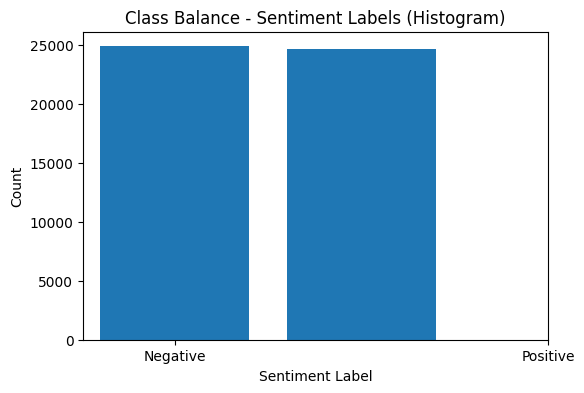

In [59]:
sentiment_counts = dataset['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.hist(dataset['sentiment'], bins=2, rwidth=0.8, align='left')
plt.xticks(range(2), labels=['Negative', 'Positive'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Class Balance - Sentiment Labels (Histogram)')
plt.show()

Barplot

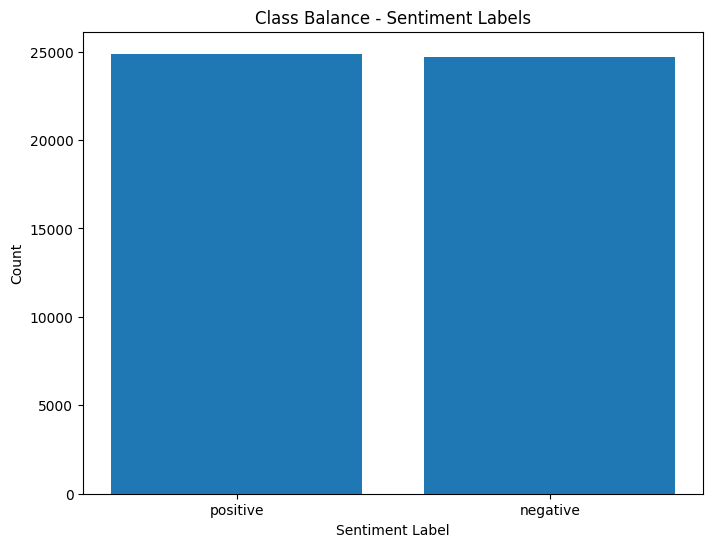

In [60]:
sentiment_counts = dataset['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Class Balance - Sentiment Labels')
plt.show()

In [61]:
from wordcloud import WordCloud, STOPWORDS

In [62]:
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    return text

## Word Frequency Analysis

In [65]:
dataset['review'] = dataset['review'].apply(preprocess_text)

In [84]:
positive_reviews = dataset[dataset['sentiment'] == 'positive']['review'].tolist()
negative_reviews = dataset[dataset['sentiment'] == 'negative']['review'].tolist()

In [68]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(negative_reviews))

word cloud

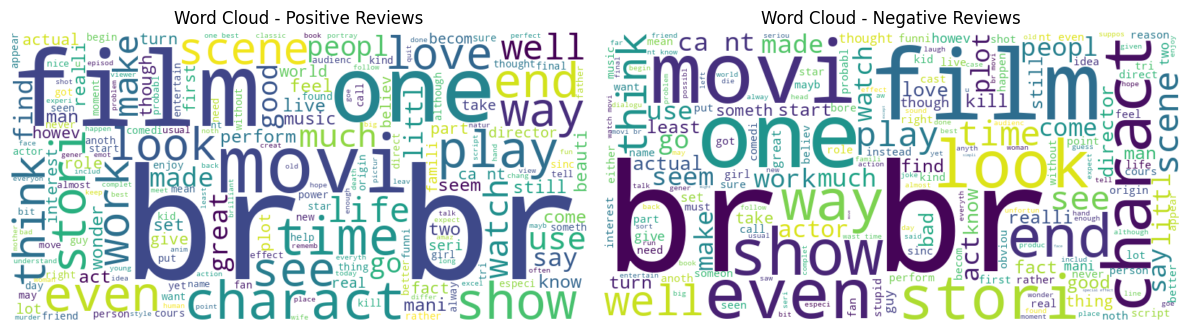

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

## Model Performance Evaluation

Confusion Matrix

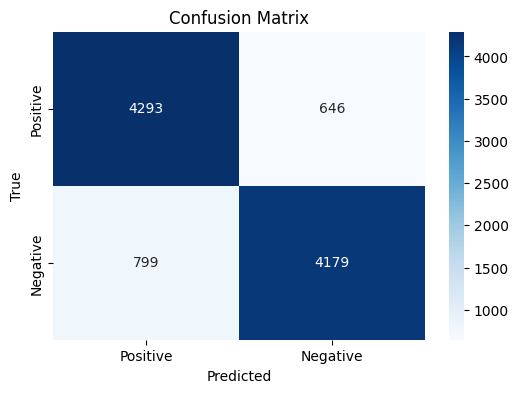

In [75]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Positive', 'Negative'], columns=['Positive', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Precision-Recall Curve

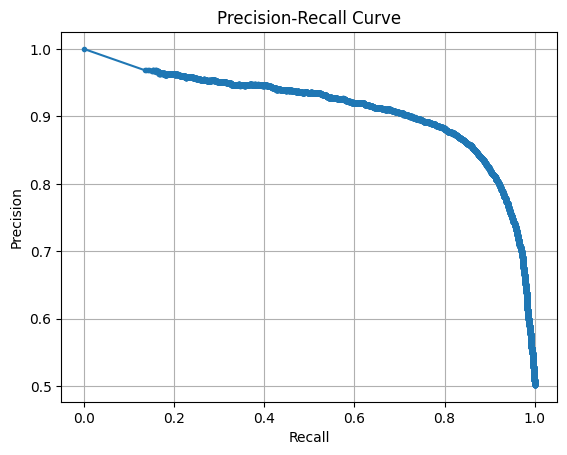

Average Precision Score: 0.9096560653984658


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)


y_pred_prob = naive_bayes_classifier.predict_proba(X_test_vectorized)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_pred_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


average_precision = average_precision_score(y_test_encoded, y_pred_prob)
print("Average Precision Score:", average_precision)

ROC Curve

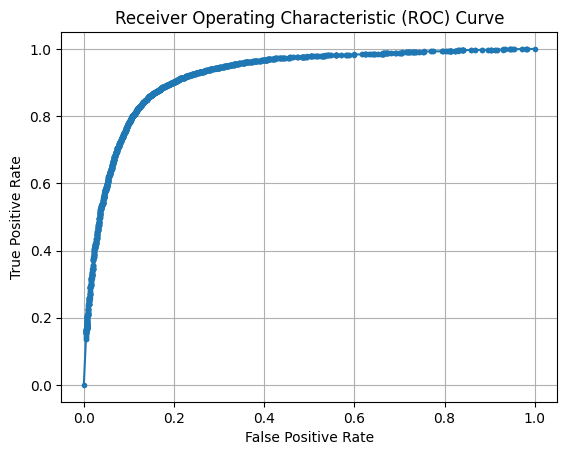

Area Under the ROC Curve (AUC): 0.9204311889910259


In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer


label_binarizer = LabelBinarizer()
y_test_encoded = label_binarizer.fit_transform(y_test)


y_pred_prob = naive_bayes_classifier.predict_proba(X_test_vectorized)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)


plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)
plt.show()


roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print("Area Under the ROC Curve (AUC):", roc_auc)